Universidad del valle de Guatemala  
Dpto. Ciencias de la computacion  
Inteligencia Artificial  
Alberto Suriano  

Laboratorio 1  
Andres Quinto - 18288  

# Task 1 - Regresión Lineal

1. Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1 ¿cuál es la interpretación del coeficiente 3w₂ en el contexto del modelo?  

    Respuesta:  

    Hay distintos puntos de suma importancia en relacion al coeficiente 3w₂ los cuales voy a listar a continuación:

    - Magnitud: El valor numerico de de 3w₂ nos indica cuanto cambia la salida Y con un cambio en X₂.
    - Dirección: Si 3w₂ es positivo significa que a medida que X₂ aumenta, Y (Variable independiente) tambien aumenta. Si el coeficiente fuera negativo, llevaria un aumento en X pero disminucion en Y.
    - Importancia Relativa: Debido a que es un coeficiente 3, significa que va a multiplicar los cambios en X por 3, lo que conlleva a que tenga cambios mas significativos a medida que crece.  


# Task 1 - Regresión Lineal

2. Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la multicolinealidad a la interpretación de los coeficientes de regresión individuales?  

    Primero debemos entender que es la multicolinealidad, se refiere a la situación en la que dos o más variables predictoras (características) en el modelo están altamente correlacionadas entre sí.  Esto significa que una variable predictora puede ser linealmente pronosticada desde las otras con un grado sustancial de precisión.  

    Ahora, esto tambien no siempre es bueno y tiene sus demas caracteristicas como por ejemplo:  

    - Estimación de Coeficientes: La multicolinealidad hace que la estimación de los coeficientes de regresión sea menos precisa.  
    - Inflación de la Varianza: Una consecuencia directa de la multicolinealidad es la inflación de la varianza de los coeficientes de regresión. Esto significa que los intervalos de confianza para los coeficientes se vuelven más amplios, lo que reduce la confiabilidad de las estimaciones de los coeficientes.  
    - Dificultades en la Interpretación: Debido a la alta correlación entre las variables, se vuelve difícil aislar el efecto de una variable independiente sobre la variable dependiente, ya que los cambios en una variable predictora están asociados con cambios en otra(s).  

    Sin embargo, esto puede verse como algo completamente malo, pero como identificamos algo asi? como podemos tratar la multicolinealidad?:

    - Factor de Inflación de la Varianza (VIF): Es una medida común para diagnosticar la multicolinealidad. Un VIF alto para una variable predictora indica una fuerte multicolinealidad.
    - Correlación entre Variables: Un análisis de correlación puede ayudar a identificar pares de variables altamente correlacionadas.

    A continuacion muestro una imagen de un modelo con una regresion con sus variables ya trabajadas y valores de VIF aceptables (2023, Frost):

    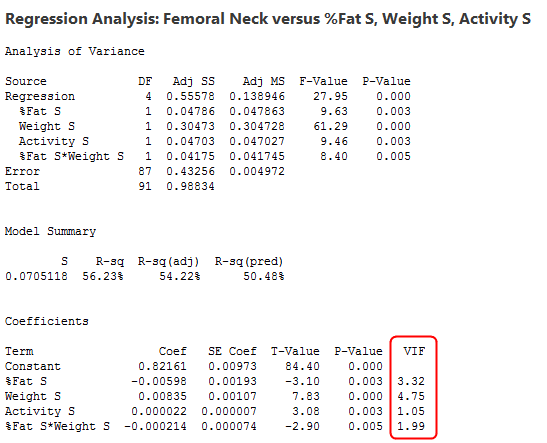

    Herramientas:
    - Eliminación de Variables: Una solución puede ser eliminar una de las variables predictoras correlacionadas.
    - Combinación de Variables: Combinar variables correlacionadas en una nueva variable representativa también puede ser útil.
    - Regularización: Métodos como la regresión Ridge o Lasso pueden ayudar a mitigar los efectos de la multicolinealidad penalizando los coeficientes de regresión.

    El material bibliografico en cual me base es el siguiente:
    
    1. Frost, Jim. "Multicollinearity in Regression Analysis: Problems, Detection, and Solutions." Statistics By Jim, 2023. Disponible en: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/.

    2. Penn State, Eberly College of Science. "Lesson 12: Multicollinearity & Other Regression Pitfalls." Disponible en: https://online.stat.psu.edu/stat501/lesson/12.